### TRAIN

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, root_mean_squared_error
from preprocess import preprocess_data, create_features
from sklearn.model_selection import RandomizedSearchCV

In [2]:
df = pd.read_csv("data/train.csv")

In [3]:
df

,record_ID,week,store_id,sku_id,total_price,cost,is_featured_sku,is_display_sku,units_used
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52
...,...,...,...,...,...,...,...,...,...
150145,212638,09/07/13,9984,223245,235.8375,235.8375,0,0,38
150146,212639,09/07/13,9984,223153,235.8375,235.8375,0,0,30
150147,212642,09/07/13,9984,245338,357.6750,483.7875,1,1,31
150148,212643,09/07/13,9984,547934,141.7875,191.6625,0,1,12


In [4]:
df = preprocess_data(df)
df = create_features(df)
df = df.dropna()

In [5]:
df

,record_ID,sku_id,cost,units_used,day,month,year,date,lag_1,lag_2,lag_4,rolling_mean_3,rolling_mean_6,quarter,dayofweek,weekofyear
6,149,216233,134.6625,50,17,1,2023,2023-01-17,133.9500,134.6625,123.9750,132.2875,131.45625,1,1,3
7,173,216233,123.2625,46,17,1,2023,2023-01-17,134.6625,133.9500,128.2500,134.4250,131.57500,1,1,3
8,194,216233,128.2500,18,17,1,2023,2023-01-17,123.2625,134.6625,134.6625,130.6250,129.79375,1,1,3
9,217,216233,125.4000,68,17,1,2023,2023-01-17,128.2500,123.2625,133.9500,128.7250,130.50625,1,1,3
10,241,216233,115.4250,31,17,1,2023,2023-01-17,125.4000,128.2500,134.6625,125.6375,130.03125,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150145,211528,679023,234.4125,4,09,7,2025,2025-07-09,234.4125,234.4125,234.4125,234.4125,234.41250,3,2,28
150146,211772,679023,234.4125,1,09,7,2025,2025-07-09,234.4125,234.4125,234.4125,234.4125,234.41250,3,2,28
150147,211852,679023,234.4125,11,09,7,2025,2025-07-09,234.4125,234.4125,234.4125,234.4125,234.41250,3,2,28
150148,211889,679023,234.4125,6,09,7,2025,2025-07-09,234.4125,234.4125,234.4125,234.4125,234.41250,3,2,28


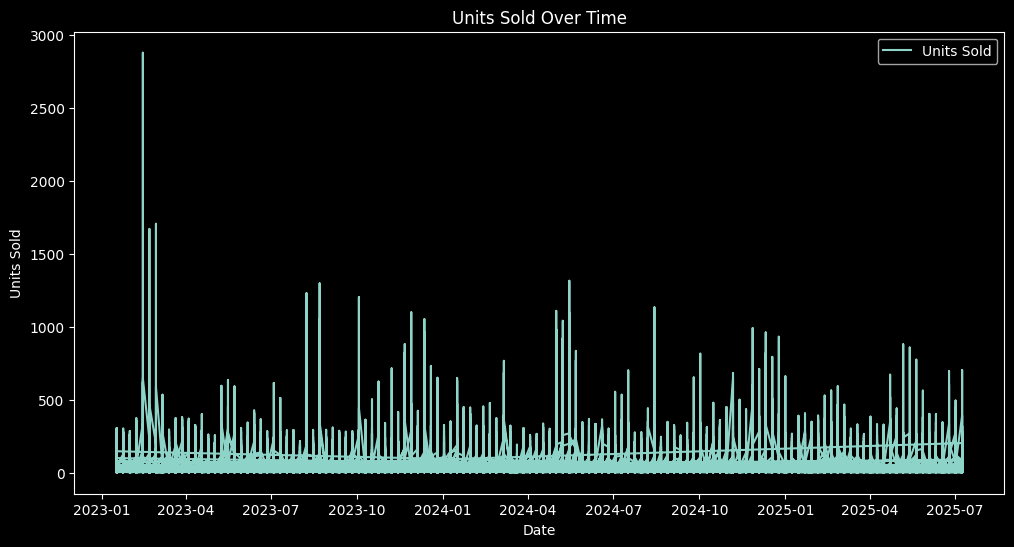

In [6]:
plt.figure(figsize=(12,6))
plt.plot(df["date"], df["units_used"], label="Units Sold")
plt.title("Units Sold Over Time")
plt.xlabel("Date")
plt.ylabel("Units Sold")
plt.legend()
plt.show()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149982 entries, 6 to 150149
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   record_ID       149982 non-null  int64         
 1   sku_id          149982 non-null  int64         
 2   cost            149982 non-null  float64       
 3   units_used      149982 non-null  int64         
 4   day             149982 non-null  object        
 5   month           149982 non-null  int32         
 6   year            149982 non-null  object        
 7   date            149982 non-null  datetime64[ns]
 8   lag_1           149982 non-null  float64       
 9   lag_2           149982 non-null  float64       
 10  lag_4           149982 non-null  float64       
 11  rolling_mean_3  149982 non-null  float64       
 12  rolling_mean_6  149982 non-null  float64       
 13  quarter         149982 non-null  int32         
 14  dayofweek       149982 non-null  int32   

In [8]:
df

,record_ID,sku_id,cost,units_used,day,month,year,date,lag_1,lag_2,lag_4,rolling_mean_3,rolling_mean_6,quarter,dayofweek,weekofyear
6,149,216233,134.6625,50,17,1,2023,2023-01-17,133.9500,134.6625,123.9750,132.2875,131.45625,1,1,3
7,173,216233,123.2625,46,17,1,2023,2023-01-17,134.6625,133.9500,128.2500,134.4250,131.57500,1,1,3
8,194,216233,128.2500,18,17,1,2023,2023-01-17,123.2625,134.6625,134.6625,130.6250,129.79375,1,1,3
9,217,216233,125.4000,68,17,1,2023,2023-01-17,128.2500,123.2625,133.9500,128.7250,130.50625,1,1,3
10,241,216233,115.4250,31,17,1,2023,2023-01-17,125.4000,128.2500,134.6625,125.6375,130.03125,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150145,211528,679023,234.4125,4,09,7,2025,2025-07-09,234.4125,234.4125,234.4125,234.4125,234.41250,3,2,28
150146,211772,679023,234.4125,1,09,7,2025,2025-07-09,234.4125,234.4125,234.4125,234.4125,234.41250,3,2,28
150147,211852,679023,234.4125,11,09,7,2025,2025-07-09,234.4125,234.4125,234.4125,234.4125,234.41250,3,2,28
150148,211889,679023,234.4125,6,09,7,2025,2025-07-09,234.4125,234.4125,234.4125,234.4125,234.41250,3,2,28


In [9]:
df = df.drop(['date'], axis=1)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149982 entries, 6 to 150149
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   record_ID       149982 non-null  int64  
 1   sku_id          149982 non-null  int64  
 2   cost            149982 non-null  float64
 3   units_used      149982 non-null  int64  
 4   day             149982 non-null  object 
 5   month           149982 non-null  int32  
 6   year            149982 non-null  object 
 7   lag_1           149982 non-null  float64
 8   lag_2           149982 non-null  float64
 9   lag_4           149982 non-null  float64
 10  rolling_mean_3  149982 non-null  float64
 11  rolling_mean_6  149982 non-null  float64
 12  quarter         149982 non-null  int32  
 13  dayofweek       149982 non-null  int32  
 14  weekofyear      149982 non-null  int64  
dtypes: float64(6), int32(3), int64(4), object(2)
memory usage: 16.6+ MB


In [11]:
df['day'] = df['day'].astype(int)
df['year'] = df['year'].astype(int)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149982 entries, 6 to 150149
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   record_ID       149982 non-null  int64  
 1   sku_id          149982 non-null  int64  
 2   cost            149982 non-null  float64
 3   units_used      149982 non-null  int64  
 4   day             149982 non-null  int64  
 5   month           149982 non-null  int32  
 6   year            149982 non-null  int64  
 7   lag_1           149982 non-null  float64
 8   lag_2           149982 non-null  float64
 9   lag_4           149982 non-null  float64
 10  rolling_mean_3  149982 non-null  float64
 11  rolling_mean_6  149982 non-null  float64
 12  quarter         149982 non-null  int32  
 13  dayofweek       149982 non-null  int32  
 14  weekofyear      149982 non-null  int64  
dtypes: float64(6), int32(3), int64(6)
memory usage: 16.6 MB


In [13]:
df.sku_id.unique()

array([216233, 216418, 216419, 216425, 217217, 217390, 217777, 219009,
       219029, 219844, 222087, 222765, 223153, 223245, 245338, 245387,
       300021, 300291, 320485, 327492, 378934, 398721, 545621, 546789,
       547934, 600934, 673209, 679023])

<Axes: >

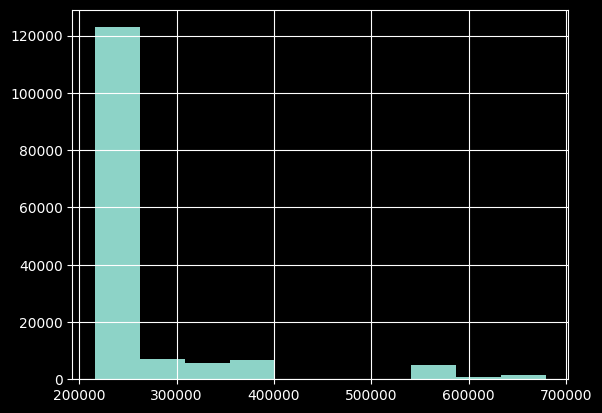

In [14]:
df.sku_id.hist()

In [15]:
df.columns

Index(['record_ID', 'sku_id', 'cost', 'units_used', 'day', 'month', 'year',
       'lag_1', 'lag_2', 'lag_4', 'rolling_mean_3', 'rolling_mean_6',
       'quarter', 'dayofweek', 'weekofyear'],
      dtype='object')

In [16]:
from sklearn.model_selection import train_test_split

X, y = df.drop('units_used', axis = 1), df['units_used'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((119985, 14), (29997, 14), (119985,), (29997,))

In [18]:
xgb = XGBRegressor(
    n_estimators=200, 
    learning_rate=0.1, 
    random_state=42, 
    enable_categorical=True
)

In [20]:
param_dist = {
    "n_estimators": [100, 200, 300, 500],
    "max_depth": [3, 4, 5, 6, 8, 10],
    "learning_rate": np.linspace(0.01, 0.3, 10),
    "subsample": np.linspace(0.5, 1.0, 6),
    "colsample_bytree": np.linspace(0.5, 1.0, 6),
    "min_child_weight": [1, 3, 5, 7, 10],
    "gamma": [0, 0.1, 0.2, 0.3, 0.5]
}

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=30,               # number of random parameter sets to try
    scoring="neg_mean_absolute_error",
    cv=3,                    # 3-fold cross validation
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

print("Best parameters found: ", random_search.best_params_)
print("Best MAE score: ", -random_search.best_score_)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best parameters found:  {'subsample': np.float64(1.0), 'n_estimators': 500, 'min_child_weight': 7, 'max_depth': 10, 'learning_rate': np.float64(0.07444444444444444), 'gamma': 0.3, 'colsample_bytree': np.float64(0.6)}
Best MAE score:  19.17824872334798


In [23]:
best_xgb = XGBRegressor(
    n_estimators=500,
    learning_rate=0.0744,
    max_depth=10,
    min_child_weight=7,
    gamma=0.3,
    colsample_bytree=0.6,
    subsample=1.0,
    random_state=42,
    enable_categorical=True
)

best_xgb.fit(X_train, y_train)
preds = best_xgb.predict(X_test)

In [28]:
y_pred = best_xgb.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mape = (np.abs((y_test - y_pred) / y_test).replace([np.inf, -np.inf], np.nan).dropna().mean()) * 100

print("MAE:", mae)
print("RMSE:", rmse)
print("MAPE:", mape)

MAE: 18.28550910949707
RMSE: 32.69552993774414
MAPE: 60.75516646838195


In [41]:
import pickle

filename = 'xgb_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(best_xgb, file)

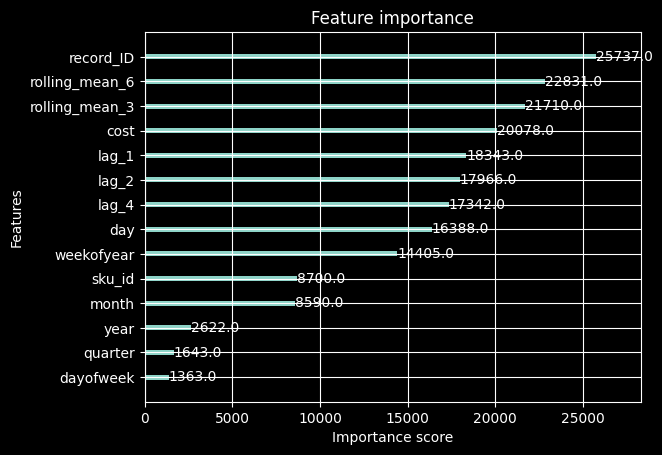

In [29]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

plot_importance(best_xgb, max_num_features=15)
plt.show()


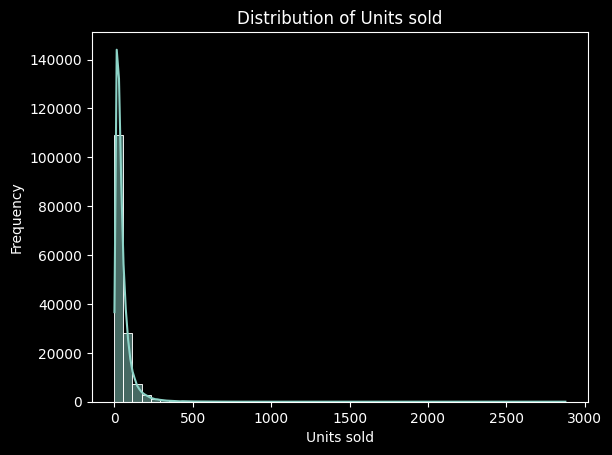

In [30]:
sns.histplot(df["units_used"], bins = 50, kde = True)
plt.title("Distribution of Units sold")
plt.xlabel("Units sold")
plt.ylabel("Frequency")
plt.show()

    sku_id        mae        mape  count
7   219009  33.591696   47.727312   1979
5   217390  27.237383   73.435336   1815
13  223245  26.939751   60.581887   1925
10  222087  26.205527   62.448403   1902
12  223153  23.622168   68.974942   1504
1   216418  23.074825   48.564941   1730
2   216419  19.166399   47.218826   1713
11  222765  18.165686   56.137769   1734
0   216233  15.773548   47.526332   1871
8   219029  15.557103   40.773296   1911
3   216425  14.980435   73.279962   1787
16  300021  13.955190   50.195128   1149
18  320485  11.098509   70.252783   1117
14  245338  10.896033   55.554483   1687
25  600934  10.870718  105.186867    171
23  546789  10.552355   69.523070    194
6   217777  10.465550   68.439936    507
24  547934  10.369711   91.037231    782
9   219844  10.354992   69.296890    722
4   217217   9.762814   71.430457    653


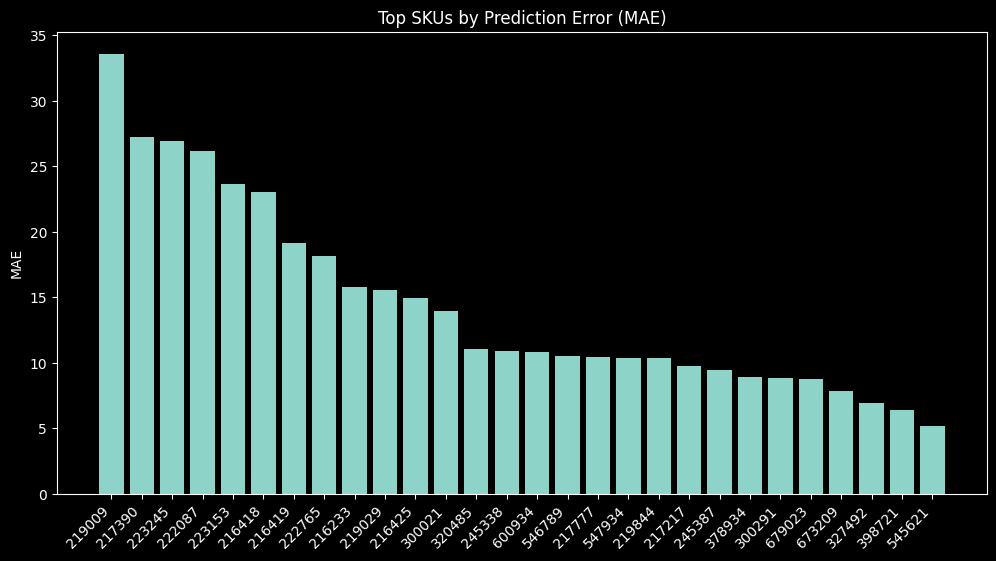

In [31]:
test_df = X_test.copy()
test_df["y_pred"] = y_pred
test_df["abs_error"] = np.abs(y_test - test_df["y_pred"])
test_df["ape"] = np.abs(y_test- test_df["y_pred"]) / (y_test + 1e-5) * 100  # avoid div by 0

# Group by SKU
sku_errors = test_df.groupby("sku_id").agg(
    mae=("abs_error", "mean"),
    mape=("ape", "mean"),
    count=("sku_id", "size")
).reset_index()

# Sort by highest MAE
sku_errors = sku_errors.sort_values("mae", ascending=False)

# Show top 20 worst SKUs
print(sku_errors.head(20))

plt.figure(figsize=(12,6))
plt.bar(sku_errors["sku_id"].astype(str), sku_errors["mae"])
plt.xticks(rotation=45, ha="right")
plt.ylabel("MAE")
plt.title(f"Top SKUs by Prediction Error (MAE)")
plt.show()

### TEST

In [49]:
test_df = pd.read_csv('data/test.csv')

In [50]:
test_df = preprocess_data(test_df)
test_df = create_features(test_df)
test_df = test_df.dropna()

In [51]:
test_df = test_df.drop(['date'], axis=1)
test_df['day'] = test_df['day'].astype(int)
test_df['year'] = test_df['year'].astype(int)

In [52]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13692 entries, 6 to 13859
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   record_ID       13692 non-null  int64  
 1   sku_id          13692 non-null  int64  
 2   cost            13692 non-null  float64
 3   day             13692 non-null  int64  
 4   month           13692 non-null  int32  
 5   year            13692 non-null  int64  
 6   lag_1           13692 non-null  float64
 7   lag_2           13692 non-null  float64
 8   lag_4           13692 non-null  float64
 9   rolling_mean_3  13692 non-null  float64
 10  rolling_mean_6  13692 non-null  float64
 11  quarter         13692 non-null  int32  
 12  dayofweek       13692 non-null  int32  
 13  weekofyear      13692 non-null  int64  
dtypes: float64(6), int32(3), int64(5)
memory usage: 1.4 MB


In [61]:
with open('xgb_model.pkl', 'rb') as file:
    demand_model = pickle.load(file)

In [62]:
forecast = demand_model.predict(test_df)

In [63]:
forecast_data = test_df.copy()

forecast_data["predicted_demand"] = forecast.astype(int)

In [64]:
forecast_data

,record_ID,sku_id,cost,day,month,year,lag_1,lag_2,lag_4,rolling_mean_3,rolling_mean_6,quarter,dayofweek,weekofyear,predicted_demand
6,212793,216233,141.0750,16,7,2025,140.3625,139.6500,131.8125,138.2250,135.61250,3,2,29,71
7,212817,216233,127.5375,16,7,2025,141.0750,140.3625,134.6625,140.3625,136.80000,3,2,29,25
8,212838,216233,125.4000,16,7,2025,127.5375,141.0750,139.6500,136.3250,135.85000,3,2,29,14
9,212861,216233,128.9625,16,7,2025,125.4000,127.5375,140.3625,131.3375,134.78125,3,2,29,26
10,212885,216233,128.9625,16,7,2025,128.9625,125.4000,141.0750,127.3000,133.83125,3,2,29,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13855,231170,679023,234.4125,1,10,2025,234.4125,234.4125,234.4125,234.4125,234.41250,4,2,40,21
13856,231414,679023,234.4125,1,10,2025,234.4125,234.4125,234.4125,234.4125,234.41250,4,2,40,21
13857,231494,679023,234.4125,1,10,2025,234.4125,234.4125,234.4125,234.4125,234.41250,4,2,40,21
13858,231531,679023,234.4125,1,10,2025,234.4125,234.4125,234.4125,234.4125,234.41250,4,2,40,21


In [ ]:
forecast_data[["record_ID", "sku_id", "day", "month", "year", "cost", "predicted_demand"]].to_csv("forecasted_results.csv", index=False)